In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

The steps to be followed are as follows:

1. Hypyterparameter tuning

2. Feature importance
3. Confusion matrix

4. Cross-validation

5. Precision

6. Recall

7. F1 score

8. Classification report

9. ROC curve

10. Area under the curve (AUC)

#### Hypyterparameter tuning KNN


In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Will try to find the best value for n_neighbors || default is 5

In [ ]:

from importnb import imports
with imports("ipynb"):
    import setUp 
    
X = setUp.X
y = setUp.y
X_train , X_test , y_train , y_test = setUp.X_train , setUp.X_test , setUp.y_train , setUp.y_test

In [18]:
train_scrores = []
test_scrores = []
np.random.seed(42)

neighbor = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbor:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    train_scrores.append(knn.score(X_train , y_train))
    test_scrores.append(knn.score(X_test , y_test))
    

In [19]:
train_scrores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [20]:
test_scrores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

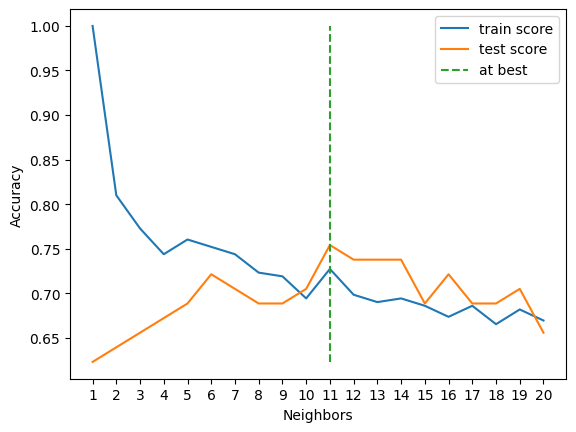

Maximum knn score on test data: 75.41%


In [42]:
from cProfile import label
from matplotlib.lines import lineStyles


plt.plot(neighbor , train_scrores , label = 'train score')
plt.plot(neighbor , test_scrores , label = 'test score')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

plt.plot([11 , 11 ], [min(min(train_scrores) , min(test_scrores)),1] , linestyle='--' , label='at best')
plt.xticks(np.arange(1 , 21 , 1) )
plt.legend()
plt.show()

print(f"Maximum knn score on test data: {max(test_scrores)*100:.2f}%")

At n_neighbors = 11 we get the best accuracy on test data. and it is : 0.7540983 but it is far lower than the other two base models.


So we say goodbye to KNN